<h1 style="text-align:center">
    Current and Future Technological Trends
</h1>

## Objectives


In this project you will perform the following:

Analyze the data and obtain valuable insights into current and future technological trends using the latest Stack Overflow Developer Survey dataset. These insights will play a key role in guiding strategic business decisions.

## Prepare environment
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Load the dataset from local disk

import zipfile

# Path to your ZIP file
zip_path = "survey_data.zip"
csv_filename = "survey_data.csv"  # name of the CSV inside the ZIP

# Open the ZIP and read the CSV directly
with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [38]:
print(df.shape)
print(df.dtypes)

(65437, 114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


In [39]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)
df.describe()

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Check                             0
Employment                        0
Age                               0
ResponseId                        0
Length: 114, dtype: int64


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


# Check for duplicates

In [40]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


# Cleaning up inconsistent values in the Country column.

In [41]:
country_dict = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'Great Britain'
}
df['Country'] = df['Country'].replace(country_dict)

# Standardizing values in the `EdLevel` column.

In [42]:
educ_dict = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Some college/university study without earning a degree': 'college/university (no degree)',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional',
    'Associate degree (A.A., A.S., etc.)': 'Associate',
}
df['EdLevel'] = df['EdLevel'].replace(educ_dict)

# Handling Missing Values

In [44]:
missing_values = df.isnull().sum().sort_values(ascending=True).head(20)
print(missing_values)

ResponseId                         0
MainBranch                         0
Age                                0
Employment                         0
Check                              0
AISelect                        4530
EdLevel                         4653
LearnCode                       4949
NEWSOSites                      5151
YearsCode                       5568
LanguageHaveWorkedWith          5692
SOAccount                       5877
SOVisitFreq                     5901
DevType                         5992
SOComm                          6274
SOHow                           6475
Country                         6507
OpSysPersonal use               7263
NEWCollabToolsHaveWorkedWith    7845
SurveyEase                      9199
dtype: int64


# Imputing missing values in numerical and categorical columns.

In [45]:
# For numerical columns (e.g., WorkExp), I filled missing values with the mean.
missing_values_WorkExp = df['WorkExp'].isnull().sum()
print(f"Missing values in 'WorkExp': {missing_values_WorkExp}")
mean_exp = round(df['WorkExp'].mean(), 2)
df['WorkExp'] = df['WorkExp'].fillna(mean_exp)
print("Mean WorkExp", mean_exp)

Missing values in 'WorkExp': 35779
Mean WorkExp 11.47


In [46]:
print(f"Missing values in 'WorkExp': {df['WorkExp'].isnull().sum()}")

Missing values in 'WorkExp': 0


In [47]:
# For categorical columns (e.g., RemoteWork), I used the mode.
missing_values_remote = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork': {missing_values_remote}")
most_frequent_value = df['RemoteWork'].mode()[0]
print(f"Most frequent value in 'RemoteWork': {most_frequent_value}")

Missing values in 'RemoteWork': 10631
Most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


In [48]:
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_value)
print(f"Missing values in 'RemoteWork': {df['RemoteWork'].isnull().sum()}")

Missing values in 'RemoteWork': 0


# Feature Scaling and Transformation.
Applying Min-Max Scaling to normalize the `ConvertedCompYearly` column.

In [51]:
# Created a new dataset
df_normalazed_comp = df[df['ConvertedCompYearly'].notnull()].copy()

# Normalozing Min-Max
min_value = df_normalazed_comp['ConvertedCompYearly'].min()
max_value = df_normalazed_comp['ConvertedCompYearly'].max()
print (f'min {min_value}')
print (f'max {max_value}')

min 1.0
max 16256603.0


In [52]:
# Added a new column 'ConvertedCompYearly_MinMax'

df_normalazed_comp['ConvertedCompYearly_MinMax'] = (
    (df_normalazed_comp['ConvertedCompYearly'] - min_value) / (max_value - min_value) )
df_normalazed_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.000450
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Professional,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,0.005616
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0.006766


Log-transforming the ConvertedCompYearly column to reduce skewness.

In [54]:
# Added a new column 'ConvertedCompYearly_Log'
df_normalazed_comp['ConvertedCompYearly_Log'] = np.log(df_normalazed_comp['ConvertedCompYearly'])
df_normalazed_comp.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Log
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.000450,8.898639
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Professional,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850,10.311416
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,0.005616,11.421851
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303,10.891224
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0.006766,11.608236
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media,NaN,...,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,0.009906,11.989433
395,396,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,121018.0,NaN,0.007444,11.703695
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,0.011995,12.180755
403,404,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,college/university (no degree),Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,44586.0,NaN,0.002743,10.705175
409,410,"I am not primarily a developer, but I write co...",55-64 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media;Colleague;Other online ...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,57999.0,NaN,0.003568,10.968181


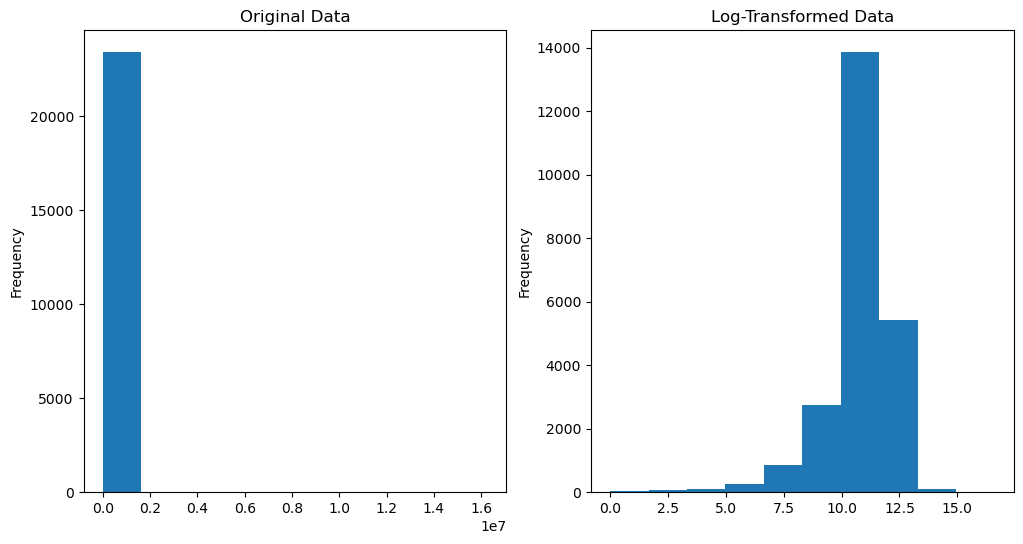

In [55]:
# Plot the original vs. log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_normalazed_comp['ConvertedCompYearly'].plot(kind='hist', bins=10, title='Original Data')
plt.subplot(1, 2, 2)
df_normalazed_comp['ConvertedCompYearly_Log'].plot(kind='hist', bins=10, title='Log-Transformed Data')
plt.show()

# Create a new column `ExperienceLevel` based on the `YearsCodePro` column

In [56]:
df_normalazed_comp['YearsCodePro'] = pd.to_numeric(df_normalazed_comp['YearsCodePro'], errors='coerce')
# Function to assign Experience Level based on YearsCodePro
def assign_experience_level(years):
    if pd.isna(years):  
        return 'Unknown'
    elif years <= 2:
        return 'Beginner'
    elif 3 <= years <= 5:
        return 'Intermediate'
    else:
        return 'Advanced'

df_normalazed_comp['ExperienceLevel'] = df_normalazed_comp['YearsCodePro'].apply(assign_experience_level)
df_normalazed_comp.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Log,ExperienceLevel
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,50.0,90.0,Too long,Easy,7322.0,10.0,0.000450,8.898639,Beginner
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Professional,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN,0.001850,10.311416,Advanced
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0,0.005616,11.421851,Advanced
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,0.003303,10.891224,Advanced
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,0.006766,11.608236,Advanced
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media,NaN,...,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,0.009906,11.989433,Advanced
395,396,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby,Master’s degree,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,NaN,NaN,NaN,Appropriate in length,Easy,121018.0,NaN,0.007444,11.703695,Advanced
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,college/university (no degree),Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,0.011995,12.180755,Advanced
403,404,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,college/university (no degree),Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Too long,Neither easy nor difficult,44586.0,NaN,0.002743,10.705175,Advanced
409,410,"I am not primarily a developer, but I write co...",55-64 years old,"Employed, full-time",In-person,Apples,Hobby;Contribute to open-source projects,Professional,Books / Physical media;Colleague;Other online ...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,Appropriate in length,Easy,57999.0,NaN,0.003568,10.968181,Advanced


### Data Analysis and Visualizing Composition 

#### 1. Current Technological Trends

##### 1.1 Top 10 Programming Languages

In [5]:
# Keep rows with non-null programming language data
lang_current = df.dropna(subset=['LanguageHaveWorkedWith'])
print(lang.shape)

# Split multiple languages per respondent
lang_current.loc[:, 'LanguageHaveWorkedWith'] = lang_current['LanguageHaveWorkedWith'].str.split(';')

# Flatten into rows
lang_exploded = lang_current.explode('LanguageHaveWorkedWith')

# Get top 10 most common languages
top_10_lang = lang_exploded['LanguageHaveWorkedWith'].value_counts().head(10)

# Convert to DataFrame and save to CSV
top_10_lang_current = top_10_lang.to_frame(name='LanguageCount')
top_10_lang_current.to_csv("Dash1_top_10_lang.csv", index=False)

(59745, 114)


##### 1.2 Top 10 Databases

In [6]:
# Keep rows with non-null database info
db_current = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split multiple databases per respondent
db_current.loc[:,'DatabaseHaveWorkedWith'] = db_current['DatabaseHaveWorkedWith'].str.split(';')

# Flatten into rows
db_exploded = db_current.explode('DatabaseHaveWorkedWith')

# Get top 10 most common databases
top_10_databases = db_exploded['DatabaseHaveWorkedWith'].value_counts().head(10)

# Convert to DataFrame and save
top_10_databases_current = top_10_databases.to_frame(name='Count')
top_10_databases_current.to_csv("Dash1_top_10_DB.csv", index=False)

##### 1.3 Top 10 Platforms

In [7]:
# Keep rows with non-null platform info
platf_current = df.dropna(subset=['PlatformHaveWorkedWith'])

# Split multiple platforms per respondent
platf_current.loc[:,'PlatformHaveWorkedWith'] = platf_current['PlatformHaveWorkedWith'].str.split(';')

# Flatten into rows
platf_exploded = platf_current.explode('PlatformHaveWorkedWith')

# Get top 10 platforms
top_10_platf = platf_exploded['PlatformHaveWorkedWith'].value_counts().head(10)

# Convert to DataFrame and save
top_10_platf_current = top_10_platf.to_frame(name='Count')
top_10_platf_current.to_csv("Dash1_top_10_platf.csv", index=False)

##### 1.4 Top 10 Web Frameworks

In [8]:
# Keep rows with non-null framework info
web_frame_current = df.dropna(subset=['WebframeHaveWorkedWith'])

# Split multiple frameworks per respondent
web_frame_current.loc[:,'WebframeHaveWorkedWith'] = web_frame_current['WebframeHaveWorkedWith'].str.split(';')

# Flatten into rows
web_frame_exploded = web_frame_current.explode('WebframeHaveWorkedWith')

# Get top 10 frameworks
top_10_web_frame = web_frame_exploded['WebframeHaveWorkedWith'].value_counts().head(10)

# Convert to DataFrame and save
top_10_web_frame_current = top_10_web_frame.to_frame(name='Count')
top_10_web_frame_current.to_csv("Dash1_top_10_web_frame.csv", index=False)

#### 2. Future Technological Trends

In [10]:
# Fields to process
fields = [
    "LanguageWantToWorkWith",
    "DatabaseWantToWorkWith",
    "PlatformWantToWorkWith",
    "WebframeWantToWorkWith"
]

# Loop through each field
for field in fields:
    # Keep rows with non-null values
    temp = df.dropna(subset=[field]).copy()
    
    # Split multiple values (assuming ';' separator)
    temp[field] = temp[field].str.split(';')
    
    # Flatten into rows
    temp_exploded = temp.explode(field)
    
    # Get top 10 items
    top_10 = temp_exploded[field].value_counts().head(10)
    
    # Convert to DataFrame
    top_10_future = top_10.to_frame(name="Count").reset_index()
    top_10_future.rename(columns={"index": field}, inplace=True)
    
    # Save to CSV (dynamic filename)
    filename = f"Dash2_top_10_{field[:-14].lower()}.csv"
    top_10_future.to_csv(filename, index=False)
    
    print(f"Saved {filename}")


Saved Dash2_top_10_language.csv
Saved Dash2_top_10_database.csv
Saved Dash2_top_10_platform.csv
Saved Dash2_top_10_webframe.csv


#### 3. Comparing Current vs. Future Programming Languages

In [4]:
# Keep only the relevant columns
df_lang = df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna()
print(df_lang.shape)

# Separate current and desired languages
worked_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
wanted_languages = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Count frequencies
worked_counts = worked_languages.value_counts()
wanted_counts = wanted_languages.value_counts()

# Convert counts to DataFrames
worked_df = pd.DataFrame(worked_counts.items(), columns=['Language', 'Count_Worked'])
wanted_df = pd.DataFrame(wanted_counts.items(), columns=['Language', 'Count_Wanted'])

# Merge and compare
language_comparison = pd.merge(worked_df, wanted_df, on='Language', how='outer').fillna(0)
language_comparison.sort_values('Count_Worked', ascending=False, inplace=True)

(55752, 2)


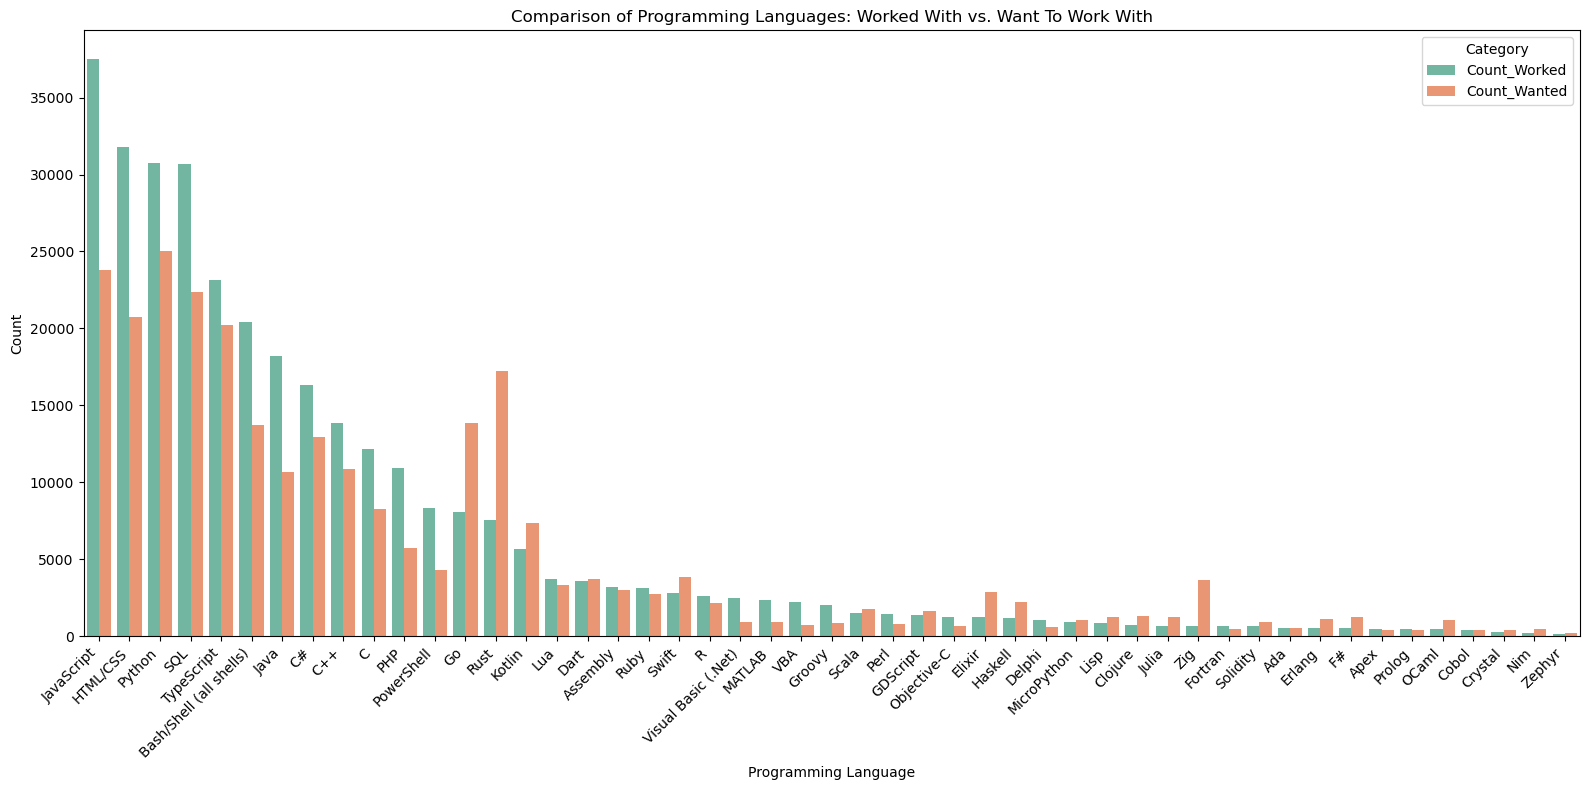

In [7]:
language_melted = language_comparison.melt(id_vars='Language', 
                                           value_vars=['Count_Worked', 'Count_Wanted'],
                                           var_name='Category', 
                                           value_name='Count')

# Create a grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(data=language_melted, x='Language', y='Count', hue='Category', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Programming Languages: Worked With vs. Want To Work With')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.tight_layout()
plt.show()